In [39]:

import numpy as np
import scipy as sc
from config import config
from random import *
from collision import simulation
#from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pickle
#from mpl_toolkits import mplot3d

In [40]:
config['detector_char']['resolution']

2.5e-05

In [41]:
sim = simulation()

In [42]:
rays_org, data_org = sim.sim_coll_()
data=pickle.load(open("tmp_files/collision_points.pkl", "rb"))
rays=pickle.load(open("tmp_files/rays.pkl", "rb"))

In [43]:
rays = np.array(rays)

In [44]:
data = np.array(data)


In [45]:
data

array([[[-0.1595625, -0.0533125,  1.       ],
        [-0.3191125, -0.1066375,  2.       ],
        [-0.4786625, -0.1599375,  3.       ],
        [-0.6382125, -0.2132625,  4.       ],
        [-0.7977625, -0.2665625,  5.       ]],

       [[-0.0195375,  0.2069125,  1.       ],
        [-0.0390875,  0.4138375,  2.       ],
        [-0.0586375,  0.6207625,  3.       ],
        [-0.0781875,  0.8276875,  4.       ],
        [-0.0977375,  1.0346125,  5.       ]],

       [[-0.1705125, -0.0257625,  1.       ],
        [-0.3410375, -0.0515375,  2.       ],
        [-0.5115375, -0.0772875,  3.       ],
        [-0.6820625, -0.1030625,  4.       ],
        [-0.8525625, -0.1288375,  5.       ]],

       [[ 0.0732125, -0.1339125,  1.       ],
        [ 0.1464125, -0.2678125,  2.       ],
        [ 0.2196125, -0.4017375,  3.       ],
        [ 0.2928125, -0.5356375,  4.       ],
        [ 0.3660125, -0.6695625,  5.       ]],

       [[ 0.0291875,  0.0946125,  1.       ],
        [ 0.0583625,  0.18

In [46]:
data[0][:]

array([[-0.1595625, -0.0533125,  1.       ],
       [-0.3191125, -0.1066375,  2.       ],
       [-0.4786625, -0.1599375,  3.       ],
       [-0.6382125, -0.2132625,  4.       ],
       [-0.7977625, -0.2665625,  5.       ]])

In [47]:
#b[:,:, 0]
color_ = ['k', 'r', 'b', 'y', 'g', 'c', 'm']

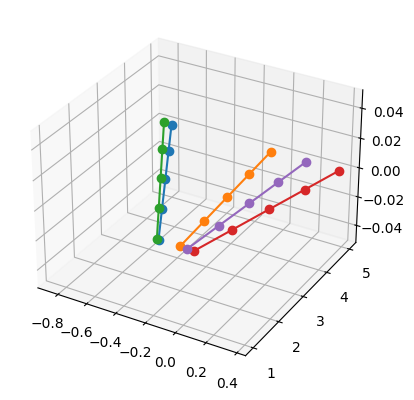

In [48]:
fig = plt.figure()
#ax = Axes3D(fig)
ax=plt.axes(projection='3d')
l_2_p = 1/2
l_2_n = -1/2

x_d = [-1/2,1/2,1/2,-1/2],[0,1,1,0]
y_d = [-1/2,-1/2,1/2,1/2],[0,0,1,1]
z_d = [0,0,0,0],[1,1,1,1]

surfaces = []

#for i in range(len(x_d)):
#    surfaces.append( [list(zip(x_d[i],y_d[i],z_d[i]))] )
#
#for surface in surfaces:
#    ax.add_collection3d(Poly3DCollection(surface))
for i,j in enumerate(data[:,:, 0]): 
# Data for a three-dimensional line
   ax.plot3D(data[:,:, 0][i], data[:,:, 2][i], "-o")
#ax.scatter3D(a[0][0], a[0][1], a[0][2], color='k')
#ax.scatter3D(0,0,0, color='r')
fig.savefig(open("track.png", "wb"))

In [49]:
tracks = []
#for i,_ in enumerate(data[:,:,0]):
rays_2, tmp_track = sim.tracks(rays, data)
tracks.append(tmp_track)

In [50]:
np.array(tracks).shape

(1, 5, 3)

In [51]:
np.array(rays_2).shape

(5, 3)

In [52]:
rays_2

array([[-0.07758058, -0.02592283,  0.48623984],
       [-0.00936825,  0.09917687,  0.47929497],
       [-0.08279412, -0.01251123,  0.48556019],
       [ 0.03576749, -0.06543214,  0.48861962],
       [ 0.01445061,  0.04684357,  0.49514661]])

In [53]:
tracks
t = np.arange(0,5)
x={}
y={}
z={}
for j,i  in enumerate(rays_2):
    x[j]=tracks[0][j][0]*t
    y[j] = tracks[0][j][1]*t
    z[j] = tracks[0][j][2]*t

In [54]:
x

{0: array([-0.     , -0.15955, -0.3191 , -0.47865, -0.6382 ]),
 1: array([-0.     , -0.01955, -0.0391 , -0.05865, -0.0782 ]),
 2: array([-0.       , -0.1705125, -0.341025 , -0.5115375, -0.68205  ]),
 3: array([0.    , 0.0732, 0.1464, 0.2196, 0.2928]),
 4: array([0.       , 0.0291825, 0.058365 , 0.0875475, 0.11673  ])}

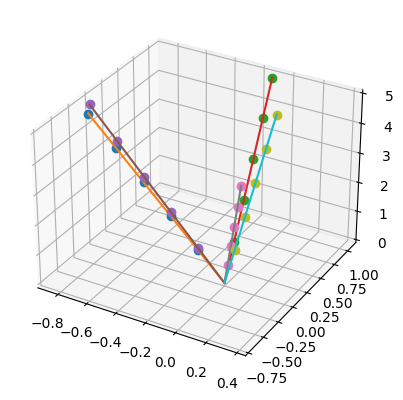

In [55]:
fig = plt.figure()
#ax = Axes3D(fig)
ax=plt.axes(projection='3d')
l_2_p = 1/2
l_2_n = -1/2

x_d = [-1/2,1/2,1/2,-1/2],[0,1,1,0]
y_d = [-1/2,-1/2,1/2,1/2],[0,0,1,1]
z_d = [0,0,0,0],[1,1,1,1]

surfaces = []

#for i in range(len(x_d)):
#    surfaces.append( [list(zip(x_d[i],y_d[i],z_d[i]))] )
#
#for surface in surfaces:
#    ax.add_collection3d(Poly3DCollection(surface))
for i,j in enumerate(data[:,:, 0]): 
# Data for a three-dimensional line
   ax.plot3D(data[:,:, 0][i], data[:,:,1][i],data[:,:, 2][i], "o")
   #for k,_ in enumerate(x[i]):
   ax.plot3D((0,5*(tracks[0][i][0])), (0,5*(tracks[0][i][1])), (0,5*(tracks[0][i][2])))
#ax.scatter3D(a[0][0], a[0][1], a[0][2], color='k')
#ax.scatter3D(0,0,0, color='r')
fig.savefig(open("track.png", "wb"))

In [56]:
tracks

[[[-0.15955000000000003, -0.05331249999999999, 1],
  [-0.01954999999999999, 0.20692500000000005, 1],
  [-0.17051250000000004, -0.02576750000000001, 1],
  [0.0732, -0.1339125, 1],
  [0.029182500000000004, 0.09460500000000001, 1]]]

In [57]:
data

array([[[-0.1595625, -0.0533125,  1.       ],
        [-0.3191125, -0.1066375,  2.       ],
        [-0.4786625, -0.1599375,  3.       ],
        [-0.6382125, -0.2132625,  4.       ],
        [-0.7977625, -0.2665625,  5.       ]],

       [[-0.0195375,  0.2069125,  1.       ],
        [-0.0390875,  0.4138375,  2.       ],
        [-0.0586375,  0.6207625,  3.       ],
        [-0.0781875,  0.8276875,  4.       ],
        [-0.0977375,  1.0346125,  5.       ]],

       [[-0.1705125, -0.0257625,  1.       ],
        [-0.3410375, -0.0515375,  2.       ],
        [-0.5115375, -0.0772875,  3.       ],
        [-0.6820625, -0.1030625,  4.       ],
        [-0.8525625, -0.1288375,  5.       ]],

       [[ 0.0732125, -0.1339125,  1.       ],
        [ 0.1464125, -0.2678125,  2.       ],
        [ 0.2196125, -0.4017375,  3.       ],
        [ 0.2928125, -0.5356375,  4.       ],
        [ 0.3660125, -0.6695625,  5.       ]],

       [[ 0.0291875,  0.0946125,  1.       ],
        [ 0.0583625,  0.18